# Linear Regression
### From Scratch

Slope: 0.8405172413793104
Intercept: -0.3103448275862073
Test predictions: [7.25431034 1.37068966]


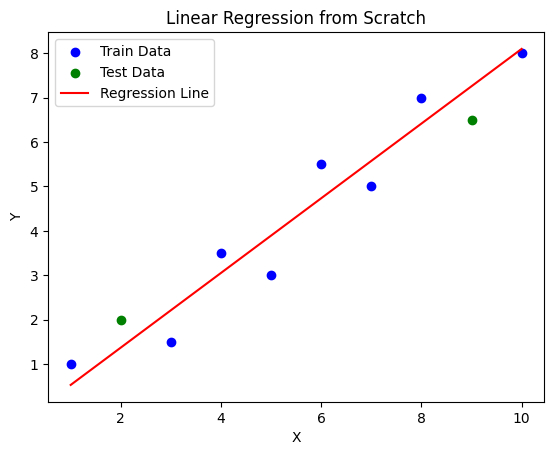

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def train_test_split(X, y, test_size=0.2, random_state=None):
    X = np.array(X)
    y = np.array(y)
    n_samples = len(X)
    indices = np.arange(n_samples)
    if random_state is not None:
        np.random.seed(random_state)
    np.random.shuffle(indices)
    test_size = int(n_samples * test_size)
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

class SimpleLinearRegression:
    def __init__(self):
        self.slope = None
        self.intercept = None

    def fit(self, x, y):
        x = np.array(x)
        y = np.array(y)
        n = len(x)
        s_x = np.sum(x)
        s_y = np.sum(y)
        s_xy = np.sum(x * y)
        s_x_sqd = np.sum(x ** 2)
        self.slope = (n * s_xy - s_x * s_y) / (n * s_x_sqd - s_x ** 2)
        self.intercept = (s_y - self.slope * s_x) / n

    def predict(self, x):
        x = np.array(x)
        return self.slope * x + self.intercept

# Example usage:
x = np.array([1,2,3,4,5,6,7,8,9,10])
y = np.array([1,2,1.5,3.5,3.0,5.5,5.0,7.0,6.5,8.0])

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train model
model = SimpleLinearRegression()
model.fit(x_train, y_train)

# Predict
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

print("Slope:", model.slope)
print("Intercept:", model.intercept)
print("Test predictions:", y_pred_test)

# Visualization
plt.scatter(x_train, y_train, color='blue', label='Train Data')
plt.scatter(x_test, y_test, color='green', label='Test Data')
plt.plot(np.sort(x), model.predict(np.sort(x)), color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression from Scratch')
plt.legend()
plt.show()


In [15]:
import numpy as np

class LinearRegressionScratch:
    def __init__(self):
        self.w = None
        self.b = None

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        y = y.reshape(-1, 1)
        theta_best = np.linalg.pinv(X_b) @ y
        self.b = theta_best[0, 0]
        self.w = theta_best[1:, 0]

    def predict(self, X):
        X = np.array(X)
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        return X @ self.w + self.b
X = [1, 2, 3, 4, 5]
y = [2, 4, 5, 4, 5]

def train_test_split(X, y, test_size=0.2, random_state=None):
    if random_state:
        np.random.seed(random_state)
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    test_set_size = int(len(X) * test_size)
    test_indices = indices[:test_set_size]
    train_indices = indices[test_set_size:]
    X = np.array(X)
    y = np.array(y)
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegressionScratch()
model.fit(X_train, y_train)
print(model.w)
print(model.b)
print(model.predict([6, 7]))


[0.68571429]
1.771428571428574
[5.88571429 6.57142857]


### Using Built-in Functions

Slope (coefficient): 0.8405172413793105
Intercept: -0.3103448275862082
Predictions on test set: [7.25431034 1.37068966]


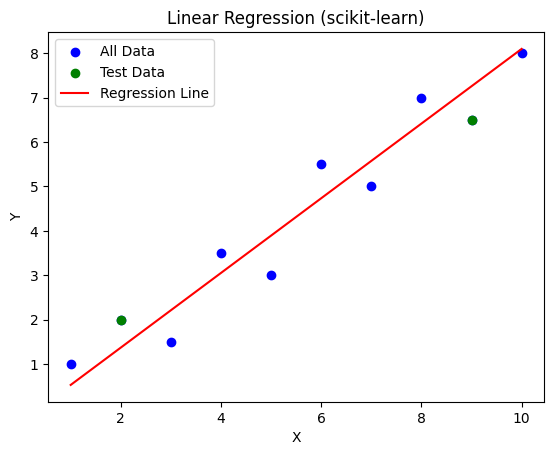

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Data
x = np.array([1,2,3,4,5,6,7,8,9,10]).reshape(-1, 1)
y = np.array([1,2,1.5,3.5,3.0,5.5,5.0,7.0,6.5,8.0])

# Split train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Build and train the model
model = LinearRegression()
model.fit(x_train, y_train)

# Predict
y_pred = model.predict(x_test)
y_line = model.predict(x)  # regression line for visualization

print("Slope (coefficient):", model.coef_[0])
print("Intercept:", model.intercept_)
print("Predictions on test set:", y_pred)

# Visualization
plt.scatter(x, y, color='blue', label='All Data')
plt.scatter(x_test, y_test, color='green', label='Test Data')
plt.plot(x, y_line, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression (scikit-learn)')
plt.legend()
plt.show()


# Logistic Regression

### From Scatch

In [17]:
import numpy as np

def train_test_split(X, y, test_size=0.2, random_state=None):
    X = np.array(X)
    y = np.array(y)
    n_samples = X.shape[0]
    indices = np.arange(n_samples)
    if random_state is not None:
        np.random.seed(random_state)
    np.random.shuffle(indices)
    test_size = int(n_samples * test_size)
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        X = np.array(X)
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        # Predict class 1 if probability >= 0.5 else 0
        return (y_predicted >= 0.5).astype(int)

# Example usage:
if __name__ == "__main__":
    # Sample binary classification dataset (simple AND logic)
    X = np.array([
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]
    ])
    y = np.array([0, 0, 0, 1])

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Train model
    model = LogisticRegressionScratch(learning_rate=0.1, n_iters=2000)
    model.fit(X_train, y_train)

    # Predict
    predictions = model.predict(X_test)
    print("Predictions:", predictions)
    print("Actual:", y_test)


Predictions: [1]
Actual: [0]


Predicted probabilities: [0.99518025 0.00721016]
Predicted labels: [1 0]
True labels: [1 0]


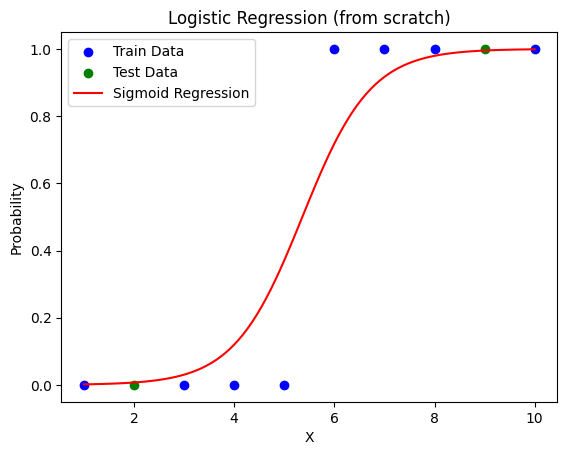

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def train_test_split(x, y, test_size=0.2, random_state=None):
    x = np.array(x)
    y = np.array(y)
    n = len(x)
    idx = np.arange(n)
    if random_state is not None:
        np.random.seed(random_state)
    np.random.shuffle(idx)
    test_sz = int(n * test_size)
    test_idx = idx[:test_sz]
    train_idx = idx[test_sz:]
    return x[train_idx], x[test_idx], y[train_idx], y[test_idx]

class LogisticRegressionScratch:
    def __init__(self, lr=0.1, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.w = 0
        self.b = 0

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, x, y):
        x = np.array(x).reshape(-1, 1)
        y = np.array(y)
        n = len(x)
        # Initialize
        w = 0.0
        b = 0.0
        for _ in range(self.n_iters):
            linear = w * x[:,0] + b
            y_pred = self.sigmoid(linear)
            dw = (1/n) * np.dot(x[:,0], (y_pred - y))
            db = (1/n) * np.sum(y_pred - y)
            w -= self.lr * dw
            b -= self.lr * db
        self.w = w
        self.b = b

    def predict_proba(self, x):
        x = np.array(x)
        linear = self.w * x + self.b
        return self.sigmoid(linear)

    def predict(self, x):
        preds = self.predict_proba(x)
        return (preds >= 0.5).astype(int)

# Prepare data (assume binary class for logistic regression)
x = np.array([1,2,3,4,5,6,7,8,9,10])
# For demo, label as 0 if y<4, label as 1 otherwise (thresholding)
y = np.array([1,2,1.5,3.5,3,5.5,5,7,6.5,8])
y_bin = (y >= 4).astype(int)

# Train/test split
x_train, x_test, y_train, y_test = train_test_split(x, y_bin, test_size=0.2, random_state=42)

# Fit logistic regression
model = LogisticRegressionScratch(lr=0.1, n_iters=2000)
model.fit(x_train, y_train)

# Predict probabilities and labels on test set
y_pred_proba = model.predict_proba(x_test)
y_pred_label = model.predict(x_test)

print("Predicted probabilities:", y_pred_proba)
print("Predicted labels:", y_pred_label)
print("True labels:", y_test)

# Visualize sigmoid over all range
x_all = np.linspace(x.min(), x.max(), 100)
y_sigmoid = model.predict_proba(x_all)

plt.scatter(x_train, y_train, color='blue', label='Train Data')
plt.scatter(x_test, y_test, color='green', label='Test Data')
plt.plot(x_all, y_sigmoid, color='red', label='Sigmoid Regression')
plt.xlabel('X')
plt.ylabel('Probability')
plt.title('Logistic Regression (from scratch)')
plt.legend()
plt.show()


### Using Built-in Functions

In [19]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Example data (use your own data as needed)
x = np.array([1,2,3,4,5,6,7,8,9,10]).reshape(-1, 1)
y = np.array([1,2,1.5,3.5,3.0,5.5,5.0,7.0,6.5,8.0])
# Convert y to binary classes for logistic regression (e.g. set threshold at y>=4)
y_bin = (y >= 4).astype(int)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y_bin, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
print("Predicted labels:", y_pred)
print("True labels:", y_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))


Predicted labels: [1 0]
True labels: [1 0]
Accuracy: 1.0


# Decision Tree

###From Scratch

In [20]:
import numpy as np

def train_test_split(X, y, test_size=0.2, random_state=None):
    X = np.array(X)
    y = np.array(y)
    n_samples = len(X)
    indices = np.arange(n_samples)
    if random_state is not None:
        np.random.seed(random_state)
    np.random.shuffle(indices)
    test_size = int(n_samples * test_size)
    test_idx = indices[:test_size]
    train_idx = indices[test_size:]
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

def gini(y):
    classes = np.unique(y)
    impurity = 1.0
    for c in classes:
        p = np.sum(y == c) / len(y)
        impurity -= p ** 2
    return impurity

def best_split(X, y):
    best_gini = 1
    best_idx, best_thr = None, None
    for idx in range(X.shape[1]):
        thresholds = np.unique(X[:, idx])
        for thr in thresholds:
            left = y[X[:, idx] <= thr]
            right = y[X[:, idx] > thr]
            if len(left) == 0 or len(right) == 0:
                continue
            score = (len(left) * gini(left) + len(right) * gini(right)) / len(y)
            if score < best_gini:
                best_gini = score
                best_idx = idx
                best_thr = thr
    return best_idx, best_thr

class Node:
    def __init__(self, gini, num_samples, num_samples_per_class, predicted_class):
        self.gini = gini
        self.num_samples = num_samples
        self.num_samples_per_class = num_samples_per_class
        self.predicted_class = predicted_class
        self.feature_index = None
        self.threshold = None
        self.left = None
        self.right = None

class SimpleDecisionTree:
    def __init__(self, max_depth=3):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        self.n_classes_ = len(np.unique(y))
        self.tree = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        num_samples_per_class = [np.sum(y == i) for i in range(self.n_classes_)]
        predicted_class = np.argmax(num_samples_per_class)
        node = Node(
            gini=gini(y),
            num_samples=len(y),
            num_samples_per_class=num_samples_per_class,
            predicted_class=predicted_class,
        )

        if depth < self.max_depth and len(np.unique(y)) > 1:
            idx, thr = best_split(X, y)
            if idx is not None:
                indices_left = X[:, idx] <= thr
                X_left, y_left = X[indices_left], y[indices_left]
                X_right, y_right = X[~indices_left], y[~indices_left]
                node.feature_index = idx
                node.threshold = thr
                node.left = self._grow_tree(X_left, y_left, depth + 1)
                node.right = self._grow_tree(X_right, y_right, depth + 1)
        return node

    def predict_one(self, x, node):
        if node.left is None and node.right is None:
            return node.predicted_class
        if x[node.feature_index] <= node.threshold:
            return self.predict_one(x, node.left)
        else:
            return self.predict_one(x, node.right)

    def predict(self, X):
        X = np.array(X)
        return np.array([self.predict_one(x, self.tree) for x in X])

# Example usage:
if __name__ == "__main__":
    # Let's use a toy dataset
    X = np.array([[2, 3], [10, 15], [3, 4], [8, 11], [1, 3]])
    y = np.array([0, 1, 0, 1, 0])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
    tree = SimpleDecisionTree(max_depth=2)
    tree.fit(X_train, y_train)
    preds = tree.predict(X_test)
    print("Predictions:", preds)
    print("Actual:", y_test)


Predictions: [1 0]
Actual: [1 0]


### Using Built-in Function

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Toy dataset
X = np.array([[2, 3], [10, 15], [3, 4], [8, 11], [1, 3]])
y = np.array([0, 1, 0, 1, 0])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Predictions:", y_pred)
print("Actual:", y_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Predictions: [1 0]
Actual: [1 0]
Accuracy: 1.0


#Random Forest

### From Scratch

In [23]:
import numpy as np

# Reuse simple train_test_split from earlier
def train_test_split(X, y, test_size=0.2, random_state=None):
    X = np.array(X)
    y = np.array(y)
    n_samples = len(X)
    indices = np.arange(n_samples)
    if random_state is not None:
        np.random.seed(random_state)
    np.random.shuffle(indices)
    test_size = int(n_samples * test_size)
    test_idx = indices[:test_size]
    train_idx = indices[test_size:]
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

# Basic Decision Tree (as in the previous reply)
def gini(y):
    classes = np.unique(y)
    impurity = 1.0
    for c in classes:
        p = np.sum(y == c) / len(y)
        impurity -= p ** 2
    return impurity

def best_split(X, y, features):
    best_gini = 1
    best_idx, best_thr = None, None
    for idx in features:
        thresholds = np.unique(X[:, idx])
        for thr in thresholds:
            left = y[X[:, idx] <= thr]
            right = y[X[:, idx] > thr]
            if len(left) == 0 or len(right) == 0:
                continue
            score = (len(left) * gini(left) + len(right) * gini(right)) / len(y)
            if score < best_gini:
                best_gini = score
                best_idx = idx
                best_thr = thr
    return best_idx, best_thr

class Node:
    def __init__(self, gini, num_samples, num_samples_per_class, predicted_class):
        self.gini = gini
        self.num_samples = num_samples
        self.num_samples_per_class = num_samples_per_class
        self.predicted_class = predicted_class
        self.feature_index = None
        self.threshold = None
        self.left = None
        self.right = None

class SimpleDecisionTree:
    def __init__(self, max_depth=3, max_features=None):
        self.max_depth = max_depth
        self.tree = None
        self.max_features = max_features

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        self.n_features_ = X.shape[1]
        self.n_classes_ = len(np.unique(y))
        self.tree = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        num_samples_per_class = [np.sum(y == i) for i in range(self.n_classes_)]
        predicted_class = np.argmax(num_samples_per_class)
        node = Node(
            gini=gini(y),
            num_samples=len(y),
            num_samples_per_class=num_samples_per_class,
            predicted_class=predicted_class,
        )
        if depth < self.max_depth and len(np.unique(y)) > 1:
            # Random subset of features at each split
            max_feats = self.max_features or self.n_features_
            features = np.random.choice(self.n_features_, max_feats, replace=False)
            idx, thr = best_split(X, y, features)
            if idx is not None:
                indices_left = X[:, idx] <= thr
                X_left, y_left = X[indices_left], y[indices_left]
                X_right, y_right = X[~indices_left], y[~indices_left]
                node.feature_index = idx
                node.threshold = thr
                node.left = self._grow_tree(X_left, y_left, depth + 1)
                node.right = self._grow_tree(X_right, y_right, depth + 1)
        return node

    def predict_one(self, x, node):
        if node.left is None and node.right is None:
            return node.predicted_class
        if x[node.feature_index] <= node.threshold:
            return self.predict_one(x, node.left)
        else:
            return self.predict_one(x, node.right)

    def predict(self, X):
        X = np.array(X)
        return np.array([self.predict_one(x, self.tree) for x in X])

# Random Forest class
class SimpleRandomForest:
    def __init__(self, n_estimators=10, max_depth=3, max_features=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.max_features = max_features
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        n_samples = X.shape[0]
        for _ in range(self.n_estimators):
            # Bootstrap sample
            idxs = np.random.choice(n_samples, n_samples, replace=True)
            X_sample = X[idxs]
            y_sample = y[idxs]
            tree = SimpleDecisionTree(max_depth=self.max_depth,
                                      max_features=self.max_features)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        # Majority vote
        predictions = np.array([tree.predict(X) for tree in self.trees])
        majority_votes = []
        for i in range(X.shape[0]):
            vals, counts = np.unique(predictions[:, i], return_counts=True)
            majority = vals[np.argmax(counts)]
            majority_votes.append(majority)
        return np.array(majority_votes)

# Example usage
if __name__ == "__main__":
    X = np.array([[2, 3], [10, 15], [3, 4], [8, 11], [1, 3], [9, 12], [3, 11], [2, 2]])
    y = np.array([0, 1, 0, 1, 0, 1, 1, 0])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
    rf = SimpleRandomForest(n_estimators=5, max_depth=2, max_features=1)
    rf.fit(X_train, y_train)
    preds = rf.predict(X_test)
    print("Predictions:", preds)
    print("Actual:", y_test)


Predictions: [1 1 0]
Actual: [1 1 0]


### Using Built-in Function

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

X = np.array([[2, 3], [10, 15], [3, 4], [8, 11], [1, 3], [9, 12], [3, 11], [2, 2]])
y = np.array([0, 1, 0, 1, 0, 1, 1, 0])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
rf = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Predictions:", y_pred)
print("Actual:", y_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Predictions: [1 1 0 0]
Actual: [1 1 0 0]
Accuracy: 1.0
